<a href="https://colab.research.google.com/github/Skriller18/Model_Comparisons/blob/main/Model_Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [2]:
!kaggle datasets download -d yuzhenlu/cottonweeddet3

100% 5.20G/5.21G [03:04<00:00, 22.8MB/s]
100% 5.21G/5.21G [03:04<00:00, 30.4MB/s]


In [3]:
!kaggle datasets download -d seroshkarim/cotton-leaf-disease-dataset

 99% 180M/181M [00:06<00:00, 32.1MB/s]
100% 181M/181M [00:06<00:00, 27.2MB/s]


In [4]:
!unzip /content/cottonweeddet3.zip

Archive:  /content/cottonweeddet3.zip
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_11.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_17.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_21.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_29.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_30.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_33.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_36.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_37.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_39.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_40.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_53.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_57.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_59.json  
  inflating: CottonWeedDet3/annotations/20190613_6062W_CM_61.json  
  inflatin

In [5]:
!unzip /content/cotton-leaf-disease-dataset.zip

Archive:  /content/cotton-leaf-disease-dataset.zip
  inflating: cotton/bacterial_blight/2015-angular-leaf-spot-colquitt-county-2.jpg  
  inflating: cotton/bacterial_blight/5586201.jpg  
  inflating: cotton/bacterial_blight/P1010086jpg - Copy.jpg  
  inflating: cotton/bacterial_blight/P1010086jpg.jpg  
  inflating: cotton/bacterial_blight/bact0.jpg  
  inflating: cotton/bacterial_blight/bact1.jpg  
  inflating: cotton/bacterial_blight/bact10.jpg  
  inflating: cotton/bacterial_blight/bact100.jpg  
  inflating: cotton/bacterial_blight/bact101.jpg  
  inflating: cotton/bacterial_blight/bact102.jpg  
  inflating: cotton/bacterial_blight/bact103.jpg  
  inflating: cotton/bacterial_blight/bact104.jpg  
  inflating: cotton/bacterial_blight/bact105.jpg  
  inflating: cotton/bacterial_blight/bact106.jpg  
  inflating: cotton/bacterial_blight/bact107.jpg  
  inflating: cotton/bacterial_blight/bact108.jpg  
  inflating: cotton/bacterial_blight/bact109.jpg  
  inflating: cotton/bacterial_blight/ba

In [6]:
!mkdir dataset

In [7]:
!mkdir dataset/train
!mkdir dataset/test

In [8]:
!mkdir dataset/train/Crop
!mkdir dataset/train/Weed
!mkdir dataset/test/Crop
!mkdir dataset/test/Weed

In [9]:
from os.path import dirname
import os

#Walk through
for dirpath, dirnames, filenames, in os.walk("/content/cotton"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 4 directories and 0 images in /content/cotton
There are 0 directories and 426 images in /content/cotton/healthy
There are 0 directories and 419 images in /content/cotton/fussarium_wilt
There are 0 directories and 418 images in /content/cotton/curl_virus
There are 0 directories and 448 images in /content/cotton/bacterial_blight


In [10]:
!mkdir Crop
!mkdir Weed

In [11]:
import os
import random
import shutil

def copy_images(source_folder, destination_folder, n):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Filter only image files (you can modify the condition as needed)
    image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png'))]

    # Select n random images
    selected_images = random.sample(image_files, n)

    # Copy selected images to the destination folder
    for image in selected_images:
        source_path = os.path.join(source_folder, image)
        destination_path = os.path.join(destination_folder, image)
        shutil.copy(source_path, destination_path)

# Example usage
source_folder = '/content/CottonWeedDet3/images'
destination_folder = '/content/Weed'
n = 426  # Number of images to select and copy

copy_images(source_folder, destination_folder, n)


In [12]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

source_folder = "/content/cotton/healthy"
train_folder = "/content/dataset/train/Crop"
test_folder = "/content/dataset/test/Crop"

file_list = os.listdir(source_folder)
train_files, test_files = train_test_split(file_list, test_size=0.2, random_state=42)

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

for file_name in train_files:
    shutil.move(os.path.join(source_folder, file_name), os.path.join(train_folder, file_name))

for file_name in test_files:
    shutil.move(os.path.join(source_folder, file_name), os.path.join(test_folder, file_name))

In [13]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

source_folder = "/content/Weed"
train_folder = "/content/dataset/train/Weed"
test_folder = "/content/dataset/test/Weed"

file_list = os.listdir(source_folder)
train_files, test_files = train_test_split(file_list, test_size=0.2, random_state=42)

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

for file_name in train_files:
    shutil.move(os.path.join(source_folder, file_name), os.path.join(train_folder, file_name))

for file_name in test_files:
    shutil.move(os.path.join(source_folder, file_name), os.path.join(test_folder, file_name))


In [14]:
#Walk through
for dirpath, dirnames, filenames, in os.walk("/content/dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /content/dataset
There are 2 directories and 0 images in /content/dataset/test
There are 0 directories and 86 images in /content/dataset/test/Weed
There are 0 directories and 86 images in /content/dataset/test/Crop
There are 2 directories and 0 images in /content/dataset/train
There are 0 directories and 340 images in /content/dataset/train/Weed
There are 0 directories and 340 images in /content/dataset/train/Crop


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

print("Training Images :")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

print("Testing Images :")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMAGE_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode="categorical")


Training Images :
Found 680 images belonging to 2 classes.
Testing Images :
Found 171 images belonging to 2 classes.


In [ ]:
#RESNET MODEL - 1

import tensorflow as tf
from tensorflow.keras import layers

def residual_block(x, filters, strides=1, downsample=False):
    identity = x
    if downsample:
        identity = layers.Conv2D(filters, 1, strides=strides, padding='same')(identity)
        identity = layers.BatchNormalization()(identity)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, identity])
    x = layers.ReLU()(x)

    return x

def create_resnet_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, strides=2, downsample=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, strides=2, downsample=True)
    x = residual_block(x, 256)

    x = residual_block(x, 512, strides=2, downsample=True)
    x = residual_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

# Create the ResNet model
input_shape = (224, 224, 3)
num_classes = 2

model = create_resnet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_21 (BatchN  (None, 112, 112, 64  256        ['conv2d_20[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# Train the model
model_history = model.fit(
                          train_data,
                          epochs=10,  # Adjust the number of epochs as needed
                          validation_data=test_data
                      )

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
22/22 [==============================] - 166s 8s/step - loss: 0.0853 - accuracy: 0.9691 - val_loss: 0.0963 - val_accuracy: 0.9766
Epoch 2/10
22/22 [==============================] - 156s 7s/step - loss: 0.0979 - accuracy: 0.9662 - val_loss: 0.8632 - val_accuracy: 0.7661
Epoch 3/10
22/22 [==============================] - 156s 7s/step - loss: 0.1171 - accuracy: 0.9662 - val_loss: 1.1296 - val_accuracy: 0.6023
Epoch 4/10
22/22 [==============================] - 159s 7s/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 4.0895 - val_accuracy: 0.6023
Epoch 5/10
22/22 [==============================] - 171s 8s/step - loss: 0.0641 - accuracy: 0.9706 - val_loss: 1.9878 - val_accuracy: 0.6901
Epoch 6/10
22/22 [==============================] - 159s 7s/step - loss: 0.1029 - accuracy: 0.9603 - val_loss: 0.1489 - val_accuracy: 0.9532
Epoch 7/10
22/22 [==============================] - 177s 8s/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.3594 - val_accuracy: 0.9064
Epoch 8/10
22

In [ ]:
#Plotting our loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="Validation_loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.ylabel("Losses")
  plt.legend()

  #Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="Validation_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()


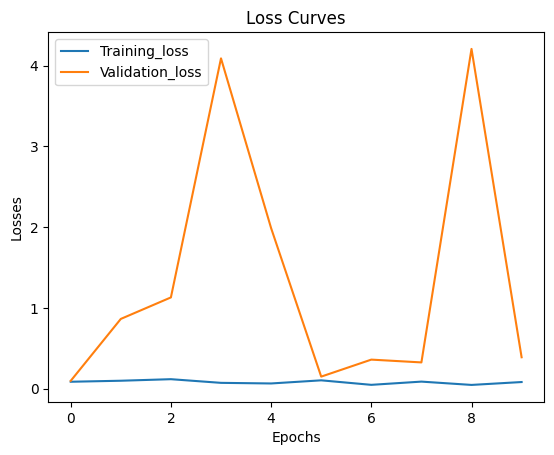

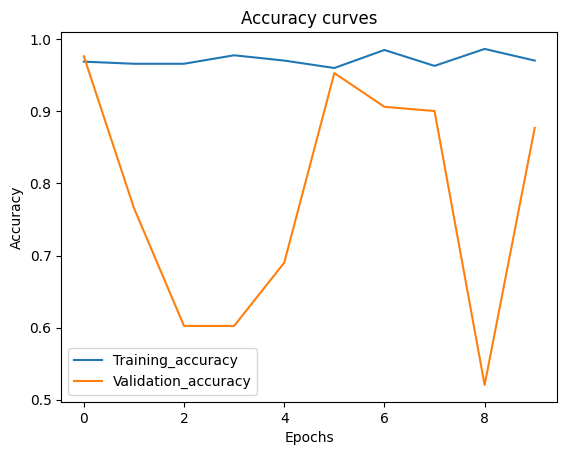

In [ ]:
plot_loss_curves(model_history)

In [19]:
#INCEPTIONNET MODEL - 3

import tensorflow as tf
from tensorflow.keras import layers

def create_inceptionnet_model(input_shape, num_classes):
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(32, 3, strides=2, padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(64, 3, strides=1, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(64, 3, strides=1, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'))

    model.add(layers.Conv2D(80, 1, strides=1, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(192, 3, strides=1, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(288, 3, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(288, 3, strides=1, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(384, 3, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Dense(num_classes, activation='sigmoid'))

    return model

# Create the InceptionNet model
input_shape = (224, 224, 3)
num_classes = 2

model2 = create_inceptionnet_model(input_shape, num_classes)

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 re_lu_9 (ReLU)              (None, 112, 112, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_17 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                                 
 re_lu_10 (ReLU)             (None, 112, 112, 64)     

In [34]:
model3_history = model3.fit(
                          train_data,
                          epochs=10,  # Adjust the number of epochs as needed
                          validation_data=test_data)

# Evaluate the model on the test data
loss, accuracy = model2.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
22/22 [==============================] - 199s 8s/step - loss: 0.7015 - accuracy: 0.4824 - val_loss: 0.6932 - val_accuracy: 0.5029
Epoch 2/10
22/22 [==============================] - 164s 7s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5029
Epoch 3/10
14/22 [==================>...........] - ETA: 47s - loss: 0.6936 - accuracy: 0.4754

KeyboardInterrupt: ignored

In [ ]:
plot_loss_curves(model2_history)

In [33]:
#VGG19 MODEL - 4

import tensorflow as tf
from tensorflow.keras import layers

def create_vgg19_model(input_shape, num_classes):
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
    model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='sigmoid'))

    return model

# Create the VGG19 model
input_shape = (224, 224, 3)
num_classes = 2

model3 = create_vgg19_model(input_shape, num_classes)

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model3.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_125 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_126 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_127 (Conv2D)         (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                

In [ ]:
plot_loss_curves(model3_history)

In [23]:
##EFFECIENT NET WORKING

from tensorflow.keras import layers, models

def build_efficient_net(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create the EfficientNet model
model4 = build_efficient_net(input_shape, num_classes)


In [26]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create the EfficientNet model
model = build_efficient_net(input_shape, num_classes)

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Specify the path to your training and testing data
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

# Set batch size and number of training steps
batch_size = 32

# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate batches of validation data (without augmentation)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Fit the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Found 680 images belonging to 2 classes.
Found 171 images belonging to 2 classes.
Epoch 1/10
22/22 [==============================] - 179s 8s/step - loss: 0.6735 - accuracy: 0.6618 - val_loss: 0.4852 - val_accuracy: 0.6901
Epoch 2/10
22/22 [==============================] - 169s 8s/step - loss: 0.2316 - accuracy: 0.9382 - val_loss: 0.3073 - val_accuracy: 0.8947
Epoch 3/10
22/22 [==============================] - 163s 8s/step - loss: 0.1955 - accuracy: 0.9382 - val_loss: 0.1614 - val_accuracy: 0.9591
Epoch 4/10
22/22 [==============================] - 165s 8s/step - loss: 0.1735 - accuracy: 0.9368 - val_loss: 0.1716 - val_accuracy: 0.9532


KeyboardInterrupt: ignored

In [28]:
from tensorflow.keras import layers, models

def build_inception_net(input_shape, num_classes):
    model = models.Sequential()

    # Stem
    model.add(layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    # Inception blocks
    model.add(layers.Conv2D(64, (1, 1), activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    model.add(layers.Conv2D(64, (1, 1), activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    model.add(layers.Conv2D(64, (1, 1), activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    # Auxiliary classifier 1
    aux1 = model.output
    aux1 = layers.GlobalAveragePooling2D()(aux1)
    aux1 = layers.Dense(128, activation='relu')(aux1)
    aux1 = layers.Dense(num_classes, activation='softmax')(aux1)

    # Inception blocks continued
    model.add(layers.Conv2D(192, (1, 1), activation='relu'))
    model.add(layers.Conv2D(320, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    model.add(layers.Conv2D(192, (1, 1), activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    model.add(layers.Conv2D(192, (1, 1), activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Auxiliary classifier 2
    aux2 = model.output
    aux2 = layers.GlobalAveragePooling2D()(aux2)
    aux2 = layers.Dense(128, activation='relu')(aux2)
    aux2 = layers.Dense(num_classes, activation='softmax')(aux2)

    # Inception blocks continued
    model.add(layers.Conv2D(192, (1, 1), activation='relu'))
    model.add(layers.Conv2D(320, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    model.add(layers.Conv2D(192, (1, 1), activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(192, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Main classifier
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create the InceptionNet model
model = build_inception_net(input_shape, num_classes)


In [31]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create the InceptionNet model
model = build_inception_net(input_shape, num_classes)

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Specify the path to your training and testing data
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/train'

# Set batch size and number of training steps
batch_size = 32

# Generate batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate batches of validation data (without augmentation)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

# Fit the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Found 680 images belonging to 2 classes.
Found 680 images belonging to 2 classes.
Epoch 1/10
22/22 [==============================] - 284s 13s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
22/22 [==============================] - 262s 12s/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
22/22 [==============================] - 259s 12s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
 7/22 [========>.....................] - ETA: 1:22 - loss: 0.6932 - accuracy: 0.5000

KeyboardInterrupt: ignored

In [32]:
import zipfile
import os

def zip_directory(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Specify the path to the folder you want to zip
folder_path = '/content/dataset'

# Specify the path and name for the output zip file
zip_path = '/content/dataset.zip'

# Zip the directory
zip_directory(folder_path, zip_path)
